In [1]:
from numpy import unique, where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
import pandas as pd

In [2]:
df_db = pd.read_csv('../../datasets/clustering_data.csv')

In [3]:
df_db.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2
1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2
3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2
4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2


In [4]:
df_db.shape

(614, 11)

In [5]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 52.9 KB


In [6]:
df_db.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.838762,0.421752,0.0,1.00,1.0,1.00,2.0
Married,614.0,0.657980,0.484971,0.0,0.00,1.0,1.00,2.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.237785,0.534737,0.0,0.00,0.0,0.00,2.0
ApplicantIncome,614.0,247.117264,143.537853,0.0,120.25,244.5,369.75,504.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [7]:
x = df_db.values

In [8]:
x


array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [17]:
model_db = DBSCAN(eps=0.30, min_samples=15)

In [18]:
preds = model_db.fit_predict(x)

In [19]:
clusters = unique(preds)

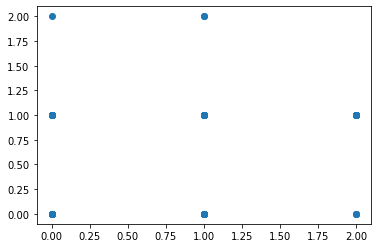

In [20]:
for cluster in clusters:
    row_ix = where(preds == cluster)
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
pyplot.show()